In [56]:
import numpy as np
import pandas as pd

import cirq
import openfermion as of
from openfermion.utils import count_qubits

from shotcounts.sortedinsertion import get_si_sets
from shotcounts.shot_metrics import r_hat_measurement_count
from shotcounts import k_qwc

import matplotlib.pyplot as plt

In [57]:
# Build hardcore boson Hamiltonian.
L = 3 
t = 1.0
jj = 5.0
two_dimensional = True

if two_dimensional:
    creation_operators = []
    annihilation_operators = []
    for i in range(L):
        creation_operators.append([])
        annihilation_operators.append([])
        for j in range(L):
            x = of.QubitOperator(f"X{i * L + j}")
            y = of.QubitOperator(f"Y{i * L + j}")
            creation_operators[i].append(0.5 * (x - complex(0.0, 1.0) * y))
            annihilation_operators[i].append(0.5 * (x + complex(0.0, 1.0) * y))

    ham = of.QubitOperator()
    for i in range(L):
        for j in range(L):
            if i != 0:
                ham += t * creation_operators[i-1][j] * annihilation_operators[i][j]
                ham += t * creation_operators[i][j] * annihilation_operators[i-1][j]
            if i != L - 1:
                ham += t * creation_operators[i+1][j] * annihilation_operators[i][j]
                ham += t * creation_operators[i][j] * annihilation_operators[i+1][j]
            if j != L - 1:
                ham += t * creation_operators[i][j+1] * annihilation_operators[i][j]
                ham += t * creation_operators[i][j] * annihilation_operators[i][j+1]
            if j != 0:
                ham += t * creation_operators[i][j-1] * annihilation_operators[i][j]
                ham += t * creation_operators[i][j] * annihilation_operators[i][j-1]
        ham += jj * creation_operators[i][j] * annihilation_operators[i][j] * creation_operators[i][j] * annihilation_operators[i][j]
else:
    creation_operators = []
    annihilation_operators = []
    for i in range(L):
        x = of.QubitOperator(f"X{i}")
        y = of.QubitOperator(f"Y{i}")
        creation_operators.append(0.5 * (x - complex(0.0, 1.0) * y))
        annihilation_operators.append(0.5 * (x + complex(0.0, 1.0) * y))

    ham = of.QubitOperator()
    for i in range(L):
        if i != L - 1:
            ham += t * creation_operators[i+1] * annihilation_operators[i]
            ham += t * creation_operators[i] * annihilation_operators[i+1]
        ham += jj * creation_operators[i] * annihilation_operators[i] * creation_operators[i] * annihilation_operators[i]


In [58]:
def groups_rhat_vs_k(qs, hamiltonian, verbose=False):
    nq = len(qs)
    kvals = list(range(1, nq + 1))
    rhats: List[float] = []
    ngroups: List[int] = []

    for k in kvals:
        blocks = k_qwc.compute_blocks(qs, k)
        groups = get_si_sets(hamiltonian, blocks=blocks)
        ngroups.append(len(groups))
        rhats.append(r_hat_measurement_count(groups))
        if verbose:
            print("On k =", k)
            print("Blocks are:")
            print(blocks)
            print(f"Finished grouping, there are {len(groups)} groups.")
            print("Groups are:")
            print(groups)
            print(f"There are {len(groups)} groups.")
            print("rhat =", rhats[-1])
    return kvals, ngroups, rhats

In [59]:
qs = cirq.LineQubit.range(L)
kvals, ngroups, rhats = groups_rhat_vs_k(qs, ham, verbose=True)

On k = 1
Blocks are:
[[cirq.LineQubit(0)], [cirq.LineQubit(1)], [cirq.LineQubit(2)]]
Finished grouping, there are 3 groups.
Groups are:
[[(-2.5+0j) [Z2], (-2.5+0j) [Z5], (-2.5+0j) [Z8], 1.0 [X0 X3], 1.0 [X0 X1], 1.0 [X1 X4], 1.0 [X3 X6], (1+0j) [Y3 Y6], 1.0 [X3 X4], (1+0j) [Y3 Y4], 1.0 [X4 X7], (1+0j) [Y4 Y7], 1.0 [X4 X5], (1+0j) [Y4 Y5], 1.0 [X5 X8], (1+0j) [Y5 Y8], 1.0 [X6 X7], (1+0j) [Y6 Y7], 1.0 [X7 X8], (1+0j) [Y7 Y8]], [(1+0j) [Y0 Y3], (1+0j) [Y0 Y1], (1+0j) [Y1 Y4], (1+0j) [Y1 Y2], (1+0j) [Y2 Y5]], [1.0 [X1 X2], 1.0 [X2 X5]]]
There are 3 groups.
rhat = 10.700931358695641
On k = 2
Blocks are:
[[cirq.LineQubit(0), cirq.LineQubit(1)], [cirq.LineQubit(2)]]
Finished grouping, there are 3 groups.
Groups are:
[[(-2.5+0j) [Z2], (-2.5+0j) [Z5], (-2.5+0j) [Z8], 1.0 [X0 X3], 1.0 [X0 X1], 1.0 [X1 X4], 1.0 [X3 X6], (1+0j) [Y3 Y6], 1.0 [X3 X4], (1+0j) [Y3 Y4], 1.0 [X4 X7], (1+0j) [Y4 Y7], 1.0 [X4 X5], (1+0j) [Y4 Y5], 1.0 [X5 X8], (1+0j) [Y5 Y8], 1.0 [X6 X7], (1+0j) [Y6 Y7], 1.0 [X7 X8], (1+0j

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
/var/folders/rv/3v7hvpgn6ks14zr4w90jz4zc0000gn/T/ipykernel_7693/3865831981.py:1: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(kvals, rhats, label="$\hat{R}$")


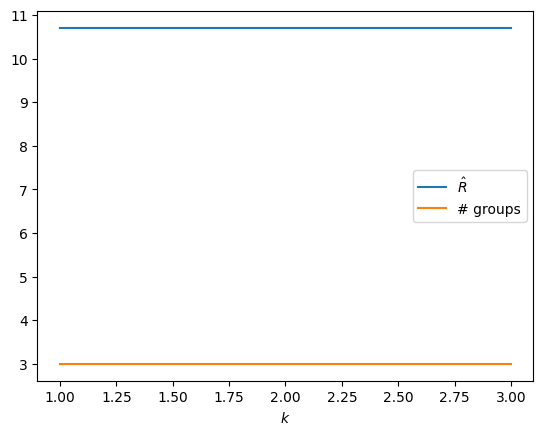

In [60]:
plt.plot(kvals, rhats, label="$\hat{R}$")
plt.plot(kvals, ngroups, label="# groups")

plt.xlabel("$k$")
plt.legend();